In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import os
import scipy as sp
from scipy import stats

/usr/local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


***

<div class="alert alert-block alert-danger">
## *Xue Kang*

***

# Homework Assignment \#2

*due Thursday, February 22nd at 12.45pm*

### n.b.
All deliverables are required to be typed and all graphs and statistical output generated in Jupyter Notebook using Python and associated packages. Deliverables with *any* handwritten elements will not be accepted and will receive a grade of zero. 

You are required to upload a ```ipynb``` file to **Canvas** as the deliverable. Use the ```homework_02.ipynb``` file as a template and write the answers in text and include relevant code below each question. Print this document, double-sided, staple it, and hand it in on Thursday, February 22nd at 12.45pm at the beinning of class.  

### Question 1

Maximum Likelihood Estimation (MLE) and Gradient Descent are two alternatives to Ordinary Least Squares that used to obtain estimates of the regression parameters. In fact, MLE and Gradient Descent are techniques often used in machine learning algorithms. Research and *briefly* discuss, both methods, their merits and their drawbacks. This answer should not exceed a page, and should probably not be shorter than a paragraph. Although the use of some light math is preferred, it is not required.

**Answer:**  

   Maximum likelihood estimation is a general approach to estimating parameters in statistical models by maximizing the likelihood function defined as $L(\theta|X)=f(X|\theta)$, that is, the probability of obtaining data X given some value of parameter $\theta$.  
       
   Knowing the likelihood function for a given problem you can look for such $\theta$ that maximizes the probability of obtaining the data you have. Sometimes we have known estimators, e.g. arithmetic mean is an MLE estimator for $\mu$ parameter for normal distribution, but in other cases you can use different methods that include using optimization algorithms. ML approach does not tell you how to find the optimal value of $\theta$ -- you can simply take guesses and use the likelihood to compare which guess was better -- it just tells you how you can compare if one value of $\theta$ is "more likely" than the other.  

   Gradient descent is an optimization algorithm. You can use this algorithm to find maximum (or minimum) of many different functions, including the likelihood function. The algorithm does not really care what is the function that it maximizes, it just does what it was asked for. So with using optimization algorithm you have to know somehow how could you tell if one value of the parameter of interest is "better" than the other. You have to provide your algorithm some function to maximize and the algorithm will deal with finding its maximum.  
        
   You can obtain maximum likelihood estimates using different methods and using an optimization algorithm is one of them. On another hand, gradient descent can be also used to maximize functions other than likelihood function.

### Question 2

Import `pga_data.csv`, data on professional male golfers. Regress `AvgDrive` ($y$), the mean length of a golfer's drive in yards, against `DrvAcc` ($x$), the percentage of times a golfer is able to land their ball on the fairway when driving the ball.

1. What is the equation of the fitted regression line?  
    **The equation of the fitted regressoin line is $Y_i = -0.9516*X_i + 348.158$**

2. Compute the sum of the residuals squared, i.e., $\sum e_i^2$  
    **$\sum e_i^2$ = 8374.056375888411**

3. Create four other regression models whereby you come up with your own values for $b_0$ and $b_1$. Compute the sum of squared residuals for each model and fill in the table below. When complete, examine the $\sum e_i^2$ columna and comment on what you have learned/confirmed.

| Model #1 | $b_0$ | $b_1$ | $\sum e_i^2$ |
|----------|-------|-------|--------------|
|   OLS    |348.158|-0.9516| 8374.056     |
|   1      |  1    |   1   | 9696833.09   |
|   2      |  2    |  10   | 4408041.97   |
|   3      |  100  |  50   | 659258.21    |
|   4      |  20   |  60   | 28033868.61  |
  
  **As $b_1$ increases gradually, the $\sum e_i^2$ value decreases, but when $b_1$ exceeds a certain threshold value, the $\sum e_i^2$ value starts to increase dramatically.**



In [16]:
pgaData = pd.read_csv('pga_data.csv')
pgaOLSmodel = sm.OLS.from_formula('AvgDrive ~ DrvAcc', pgaData).fit()
print("b0={}".format(pgaOLSmodel.params[0]))
print("b1={}".format(pgaOLSmodel.params[1]))
#SSE
print("Sum of Residuals Squared = {}".format(pgaOLSmodel.ssr))

b0=348.15760961697424
b1=-0.9516250664729603
Sum of Residuals Squared = 8374.056375888411


#### Questin 2.3 code and process

In [6]:
x_array = pgaData['DrvAcc']
y_array = pgaData['AvgDrive']
def line(x_array, b0, b1):      
    return [b0+b1*x for x in x_array]
def calc_ssr (y_array, y_hat_array):
    y1 = np.array(y_array)
    y2 = np.array(y_hat_array)
    return np.sum((y1-y2) ** 2)

y_hat_array1 = line(x_array, 1, 1)
ssr1 = calc_ssr(y_array, y_hat_array1)
print("ssr1 = {}".format(ssr1))

y_hat_array2 = line(x_array, 10, 2)
ssr2 = calc_ssr(y_array, y_hat_array2)
print("ssr2 = {}".format(ssr2))

y_hat_array3 = line(x_array, 15, 5)
ssr3 = calc_ssr(y_array, y_hat_array3)
print("ssr3 = {}".format(ssr3))

y_hat_array4 = line(x_array, 20, 10)
ssr4 = calc_ssr(y_array, y_hat_array4)
print("ssr4 = {}".format(ssr4))

ssr1 = 9696833.09
ssr2 = 4408041.970000001
ssr3 = 659258.21
ssr4 = 28033868.61


### Question 3

Import `platsicHardness.txt`. The first column of data represents plastic hardness in Brinell units ($y$) and the second column data represents the number of hours elapsed since the plastic was molded ($x$). Run a SLR model along with all relevant diagnostics---do not include numerical/graphical output, just a basic summary, written or tabular, of what you found. Succinctly discuss what you observe. Do you observe any issues with the model?  
    **Answer: According to the diagnostics result, the SLR model has small SSE value, large SSR value, large $R^2$ value, The model has large F-statistic and significant p-value, so from this aspect the model does a good job with our data.**

Run a Brown-Forsythe test to determine whether or not the error variances varies with the level of $x$. Divide the data into two groups, $x \leq 24$ and $x > 24$, and use $\alpha = 0.05$. State the hypothesis test, decision rule, and the conclusion. Discuss this result in context of what you discovered earlier.  
    **Answer: The hypothesis test is $H_0: \sigma_1^2 = \sigma_2^2$, $H_a : \sigma_1^2 \neq \sigma_2^2$. The p-value of LeveneResult is greater than $\alpha = 0.05$. Therefore, we do not reject the $H_0: \sigma_1^2 = \sigma_2^2$. So the residuals have homoscedasticity.**

In [7]:
plastic_data = pd.read_csv('plasticHardness.txt', delim_whitespace=True, header=None, names=['y', 'x'])
olsmodel = sm.OLS.from_formula('y ~ x', plastic_data)
res = olsmodel.fit()
print('SSE: {}'.format(res.ssr))
print('SSR: {}'.format(res.ess))
print('SSTO: {}'.format(res.centered_tss))
print('R-squared: {}'.format(res.rsquared))
print('F-value: {}'.format(res.fvalue))
print('F-pvalue: {}'.format(res.f_pvalue))
#print(res.summary())
beta0 = res.params[0]
beta1 = res.params[1]
# r1 = sns.residplot('x', 'y', data = plastic_data)
# r1.set(xlabel=' (X)', ylabel='Residuals (e)')
# sns.lmplot("x", "y", data=plastic_data, ci = None)
sample_1 = res.resid[plastic_data.x<=24]
sample_2 = res.resid[plastic_data.x>24] 
sp.stats.levene(sample_1, sample_2, center = 'median')

SSE: 146.425
SSR: 5297.5125
SSTO: 5443.9375
R-squared: 0.9731031078148858
F-value: 506.5062318593136
F-pvalue: 2.1588136825250703e-12


LeveneResult(statistic=0.7323685436484627, pvalue=0.40652533559298387)

### Question 4

Import `copierMaintenanceData.csv`. Column 1 is $y$ and column 2 is $x$.

$x$ are the number of photocopiers serviced by a service company at a given location, and $y$ are the total number of minutes spent by the service person. 

Answer the following questions.

1. Obtain the OLS estimates of the parameters.  
    **The parameters are:** $b_0=-0.5801566579634511,b_1=15.035248041775455$
2. Write out the fitted regression equation.  
    **The fitted regression equation is** $Y_i=-0.58016+15.03525*X_i$.
3. What is the numerical value of $\sum e_i^2$?  
    **The numerical value of $\sum e_i^2$ is 3416.377**
4. Does $b_0$ provide any relevant information in this context?  
    **$b_0$ is a negative value, which seems to imply when there are 0 copiers in service, the minutes spent by the service person is negative, which has no informative value to us.**
5. Obtain a point estimate of the mean service time when 5 copiers are serviced.  
    **Estimated time is 74.596084 min when 5 copiers are serviced.**
6. Compute the confidence and prdiction intervals when 5 copiers are serviced.  
    **The confidence interval is \[71.914224 ~ 77.277943\]**  
    **The prediction interval is \[56.421325 ~ 92.770842\]**
7. Test the hypothesis that $H_0: \beta_1 = 0$ using a $t$ test. Show all work.  
    **assume $\alpha = 0.05$  
      t_crit = 2.0166921941428138  
      t_star = 31.1287784679089  
      t_star > t_crit therefore reject null $H_0:\beta_1 = 0$  
      Using confidence intervals:  
      95%CI = 14.061137670229021 ~ 16.00926232977098 
      CI doest not contain zero, therefore can reject null $H_0:\beta_1 = 0$  
    **

In [8]:
cmdata = pd.read_csv('copierMaintenanceData.csv', header=None, names=['y', 'x'])
cmOLSmodel = sm.OLS.from_formula('y ~ x', cmdata).fit()
#print(cmdata.head(5))
#print(cmdata.shape) -> get the # of rows = 45
#xyplot = sns.lmplot("x", "y", data=cmdata, ci = None)
print("b0={}".format(cmOLSmodel.params[0]))
print("b1={}".format(cmOLSmodel.params[1]))
print("Sum of Residuals Squared = {}".format(cmOLSmodel.ssr))
#Test the hypothesis that  H0:β1=0  using a t test:
cmOLSmodel.summary()
print("t_crit = {}".format(sp.stats.t.isf(.025,43)))
print("t_star = {}".format(15.0352/0.483))
interval_left = 15.0352-sp.stats.t.isf(0.025,43)*0.483
interval_right = 15.0352+sp.stats.t.isf(0.025,43)*0.483
print("95%CI = {} ~ {}".format(interval_left, interval_right))
#confidence intervals
cmOLSmodel.get_prediction({'x':[5]}).summary_frame(alpha=0.05)

b0=-0.5801566579634511
b1=15.035248041775455
Sum of Residuals Squared = 3416.377023498696
t_crit = 2.0166921941428138
t_star = 31.1287784679089
95%CI = 14.061137670229021 ~ 16.00926232977098


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,74.596084,1.329831,71.914224,77.277943,56.421325,92.770842


### Question 5

1. Create a vector of 10,000,000 random variables $\sim \mathcal{U}\{0,1\}$ and store them in the list called `myRndUnif`. Randomly sample 100,000 values `myRndUnif` from this vector and create a histogram from the sample. What is the distribution of the sample (visually)? Repeat this exercise a few more times, if necessary, to convince yourself that when randomly sampling from a $\mathcal{U}\{a,b\}$ distribution, the sample is also $\sim \mathcal{U}\{a,b\}$.
    
2. Randomly sample 100,000 **pairs** of values (groups of 2), and create a histogram of the mean of these samples. What does the distribution look like?

3. Randomly sample 100,000 **groups of five values**, and create a histogram of the mean of these samples. What does the distribution look like?

4. Randomly sample 100,000 **groups of ten values**, and create a histogram of the mean of these samples. What does the distribution look like?

5. Randomly sample 100,000 **groups of thirty values**, and create a histogram of the mean of these samples. What does the distribution look like?

6. Repeat steps 1 through 5 using an **exponential distribution**.

#### Answer 5

1. The distribution of the sample is a **rectangle** (visually) with a randomly fluctuated upper edge.

2. The distribution looks like a **triangle**.

3. The distribution looks like a **normal distribution**.

4. The distribution looks like a **normal distribution**.

5. The distribution looks like a **normal distribution**.

6. The distributions look like a **exponential distribution** at first, then as the size of group increases, the distribution starts to lean towards a **normal distribution**.  

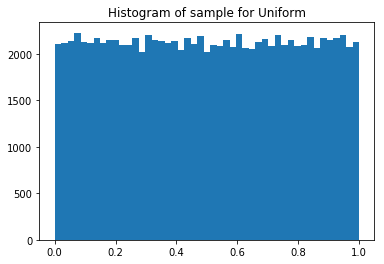

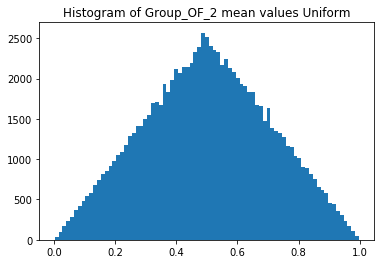

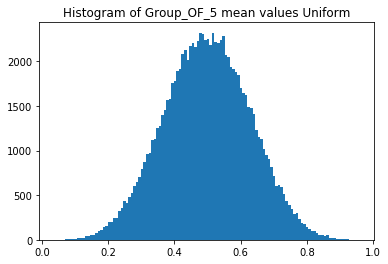

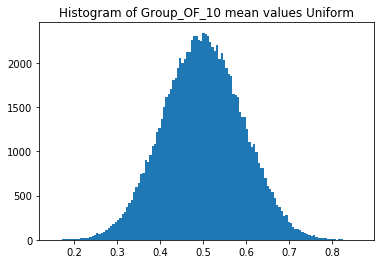

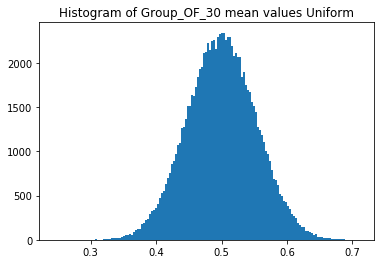

In [47]:
from numpy import random
myRndUnif = np.random.uniform(0,1,10000000)
sample1 = random.choice(myRndUnif,100000)
#np.histogram(sample1)
plt.hist(sample1, bins='auto')
plt.title("Histogram of sample for Uniform")
plt.show()

sample2 = random.choice(myRndUnif,size=(100000,2))
#print(sample2[0:5])
sample2df = pd.DataFrame(sample2)
mean_series2 = sample2df.mean(1)
plt.hist(mean_series2, bins='auto')
plt.title("Histogram of Group_OF_2 mean values Uniform")
plt.show()

sample3 = random.choice(myRndUnif,size=(100000,5))
sample3df = pd.DataFrame(sample3)
mean_series3 = sample3df.mean(1)
plt.hist(mean_series3, bins='auto')
plt.title("Histogram of Group_OF_5 mean values Uniform")
plt.show()

sample4 = random.choice(myRndUnif,size=(100000,10))
sample4df = pd.DataFrame(sample4)
mean_series4 = sample4df.mean(1)
plt.hist(mean_series4, bins='auto')
plt.title("Histogram of Group_OF_10 mean values Uniform")
plt.show()

sample5 = random.choice(myRndUnif,size=(100000,30))
sample5df = pd.DataFrame(sample5)
mean_series5 = sample5df.mean(1)
plt.hist(mean_series5, bins='auto')
plt.title("Histogram of Group_OF_30 mean values Uniform")
plt.show()

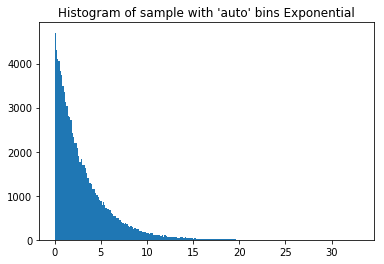

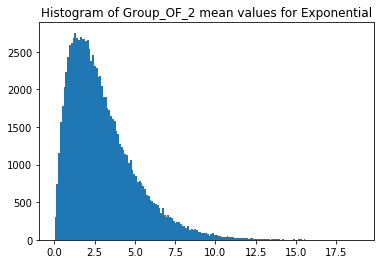

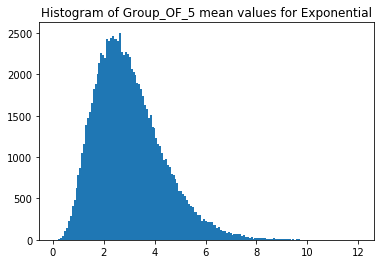

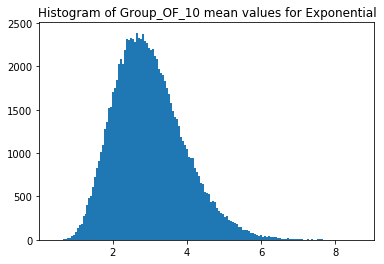

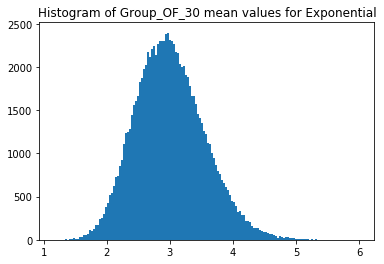

In [48]:
myRndExp = np.random.exponential(3.0,10000000)
sample_1e = random.choice(myRndExp,100000)
#np.histogram(sample)
plt.hist(sample_1e, bins='auto')
plt.title("Histogram of sample with 'auto' bins Exponential")
plt.show()

sample_2e = random.choice(myRndExp,size=(100000,2))#sample2 of exponential distribution
sample_2e_df = pd.DataFrame(sample_2e)
mean_series_2e = sample_2e_df.mean(1)
plt.hist(mean_series_2e, bins='auto')
plt.title("Histogram of Group_OF_2 mean values for Exponential")
plt.show()

sample_3e = random.choice(myRndExp,size=(100000,5))#sample2 of exponential distribution
sample_3e_df = pd.DataFrame(sample_3e)
mean_series_3e = sample_3e_df.mean(1)
plt.hist(mean_series_3e, bins='auto')
plt.title("Histogram of Group_OF_5 mean values for Exponential")
plt.show()

sample_4e = random.choice(myRndExp,size=(100000,10))#sample2 of exponential distribution
sample_4e_df = pd.DataFrame(sample_4e)
mean_series_4e = sample_4e_df.mean(1)
plt.hist(mean_series_4e, bins='auto')
plt.title("Histogram of Group_OF_10 mean values for Exponential")
plt.show()

sample_5e = random.choice(myRndExp,size=(100000,30))#sample2 of exponential distribution
sample_5e_df = pd.DataFrame(sample_5e)
mean_series_5e = sample_5e_df.mean(1)
plt.hist(mean_series_5e, bins='auto')
plt.title("Histogram of Group_OF_30 mean values for Exponential")
plt.show()

### Question 6

You compute a coefficient of determination for a regression model an obtain an $R^2=0.832$. What does the strength of the coefficient of determination say about the causal relationship between the explanatory and response variables?

**Answer:**  
    The R-squared value **does not** indicate that the explanatory variable x causes any change in the response variable y. So we can not conclude any causal relationship from this $R^2$ = 0.832. high $R^2$ does not imply that good predictions can be made.  
    Moreover, although larger $R^2$ is better than smaller $R^2$, high $R^2$ does not imply that the estimated regression line is a good fit, we need to take consideration of multiple diagonostics results in order to assess a model.

### Question 7

When testing for the normality of residuals, I suggested you use a normality test such as the Shapiro-Wilk test. 

1. Read the entry at the following link: https://www.r-bloggers.com/normality-tests-don%E2%80%99t-do-what-you-think-they-do/

2. Generate 10,000 standard normal random variates, and run a Shapiro-Wilk test on them to test for normality, using the Shapiro Wilk test in in the `SciPy` package. Why does this fail? What internal limitations are included in `scipy.stats.shapiro()` to ensure that the problems described in the URL above don't occur?  
    **Discussion:**   
      The Shapiro-Wilk hyposthesis test is $H_0:normally distributed data$,$H_a:non-normally distributed data$, where a p-value < $\alpha$ is a rejection of the null hypothesis.   
      When running the scipy.stats.shipro() on my randomly generated data, every time the code is run, different p-values are generated as the data is randomly generated, but the p-value is greater than 0.05 for most of the time, thus we do not reject the null hypothesis.  
      In the sp.stats.shapiro() function, p-value may not be accurate for N > 5000.   
      From the URL we know: "The problem is that when the sample size is small, even big departures from normality are not detected, and when your sample size is large, even the smallest deviation from normality will lead to a rejected null." And in the case of this question, firstly we have a sample size of 10000 which is pretty large, and the sample data are gererated with standard normal random method, so it makes sense that the null hypothesis are not rejected.

In [45]:
import pylab
array = np.random.normal(0,1,10000)
print(sp.stats.shapiro(array)[1])
#sp.stats.probplot(array, dist="norm", plot = pylab)

0.8438358306884766


/usr/local/lib/python3.5/site-packages/scipy/stats/morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Question 8

Import `pga_data.csv`, data on professional male golfers. Regress `AvgDrive` ($y$), the mean length of a golfer's drive in yards, against `DrvAcc` ($x$), the percentage of times a golfer is able to land their ball on the fairway when driving the ball. Manually code up a numerical Box-Cox search procedure for $\lambda \in [-5, 5]$ in increments of 0.1 to find the $\lambda$ that minimizes SSE for this model. Create a graph with $\lambda$ on the $x$-axis and $SSE_{\lambda}$ on the $y$-axis. Report the $\lambda$ that minimizes SSE for this model.

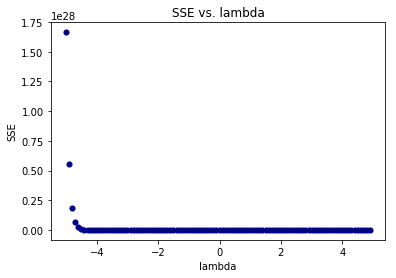

minimum SSE is 28475.879475073307, when lambda is 4.899999999999965


In [3]:
pga_data = pd.read_csv('pga_data.csv')
Y = pga_data['AvgDrive']
X = pga_data['DrvAcc']
epislon = 1e-10
lamb_array = np.arange(-5, 5, 0.1)
sse_array = []
for lamb in lamb_array:
    K2 = sp.stats.mstats.gmean(Y)
    K1 = 1/(lamb*(K2**(lamb-1)))
    W = K1 * (Y ** lamb - 1)
    if abs(lamb) < epislon:
        W = K2 * np.log(Y)
    lsmodel = sm.OLS(W, X)
    res = lsmodel.fit()
    sse_array.append(res.ssr)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(lamb_array, sse_array, color='darkblue', linewidth=0.1)
ax.set_xlabel('lambda')
ax.set_ylabel('SSE')
ax.set_title('SSE vs. lambda')
plt.show()
min_idx = np.argmin(sse_array)
best_lamb = lamb_array[min_idx]
min_sse = sse_array[min_idx]
print("minimum SSE is {}, when lambda is {}".format(min_sse, best_lamb))
# df = pd.DataFrame({'lamda':lamb_array, 'SSE':sse_array})
# df.plot('lamda', 'SSE', kind='scatter')